In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv('data_capture_2.csv')

In [102]:
df.head()

,PosX,PosY,RSSI,Name,Timestamp
0,7.684553,5.192935,-76,egopi1,1488829407870
1,7.684553,5.192935,-66,egopi3,1488829407887
2,7.684553,5.192935,-66,egopi3,1488829408007
3,7.684553,5.192935,-74,egopi1,1488829408120
4,7.684553,5.192935,-62,egopi3,1488829408135


In [103]:
df = df[df.Name.str.startswith('egopi')]

In [104]:
len(df)

6813

In [105]:
df['Label'] = df.PosX.apply(lambda x: df.PosX.unique().tolist().index(x))

In [106]:
newX = []
newY = []
for i in range(len(X) - 20):
    window = df.ix[i:i+20]
    x = window.groupby("Name").RSSI.mean().as_matrix().T
    if not x.shape == (2,):
        if len(window.Label.unique()) == 1:
            newX.append(x)
            newY.append(window.iloc[0].Label)

In [107]:
newX = np.stack(newX, axis=0)
newY = np.stack(newY, axis=0)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [109]:
rf = RandomForestClassifier(n_estimators=200)

In [110]:
cross_val_score(rf, newX, newY, cv=10).mean()

0.8274082089194833

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
nb = MultinomialNB()

In [116]:
cross_val_score(nb, np.abs(newX), newY, cv=10).mean()

0.75959827985684436

In [117]:
import xgboost as xgb

In [118]:
from sklearn.cross_validation import train_test_split

In [127]:
gb = xgb.XGBClassifier(max_depth=3)

In [128]:
cross_val_score(gb, newX, newY, cv=10).mean()

0.82694113484191423

In [129]:
from sklearn.manifold import TSNE

In [130]:
tsne = TSNE()

In [131]:
tranformedX = tsne.fit_transform(newX)

In [132]:
colors = ['red', 'green', 'blue', 'yellow']
c = [colors[label] for label in newY]

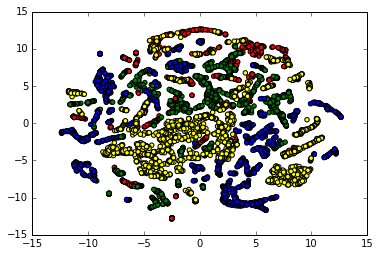

In [137]:
plt.scatter(tranformedX[:, 0], tranformedX[:, 1], c=c)